In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
from skompiler import skompile
filterwarnings('ignore')

In [5]:
diabetes = pd.read_csv('diabetes.csv')
df = diabetes.copy()
df = df.dropna()
y = df['Outcome']
X = df.drop(['Outcome'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 44)

In [6]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [7]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [14]:
rf_params = {
    'max_depth':[2,5,8,10],
    'max_features':[2,5,8],
    'n_estimators':[10,500,1000],
    'min_samples_split':[2,5,10]
}

In [15]:
rf = RandomForestClassifier()

In [16]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1, verbose = 2)

In [17]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [18]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [20]:
rf_tuned = RandomForestClassifier(max_depth = 10, max_features = 2, min_samples_split = 10, n_estimators = 500)
rf_tuned = rf_tuned.fit(X_train, y_train)

In [22]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7748917748917749

Text(0.5, 0, 'Değişken önem düzeyi')

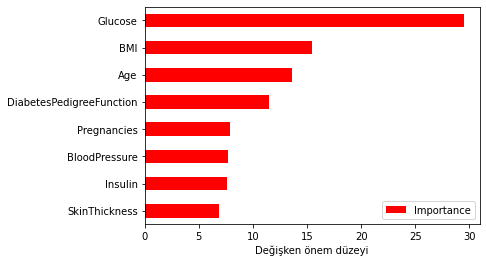

In [23]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Değişken önem düzeyi')